In [9]:
 #This example uses Python 2.7 and the python-request library.

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f7399832-68eb-40a5-81a3-d0758df7eced',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  
#To use this you must go into the Anaconda powershell prompt and
#use "jupyter notebook --NotebookApp.iopub_data_rate_limit 100000000"
#to increase the bitrate.

{'status': {'timestamp': '2023-05-26T20:36:26.265Z', 'error_code': 0, 'error_message': None, 'elapsed': 33, 'credit_count': 1, 'notice': None, 'total_count': 10080}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10228, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [2]:
type(data)

dict

In [22]:
import pandas as pd

#This allows you to see all the columns, not just 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10228,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.938456e+07,1.938456e+07,False,NaN,1,NaN,NaN,None,2023-05-26T20:35:00.000Z,26778.424533,1.280855e+10,-9.5359,-0.085015,1.157749,-0.303148,-4.161094,-0.938197,16.748059,5.190880e+11,46.2267,5.623469e+11,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
1,1027,Ethereum,ETH,ethereum,6945,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202581e+08,1.202581e+08,True,NaN,2,NaN,NaN,None,2023-05-26T20:35:00.000Z,1835.963780,5.519204e+09,-15.4818,0.055085,1.462151,1.216745,-0.310629,7.500200,16.244904,2.207895e+11,19.6621,2.207895e+11,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
2,825,Tether,USDT,tether,54579,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.309027e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-26T20:35:00.000Z,1.000294,1.915100e+10,-10.6280,-0.002180,0.032243,0.009341,0.001629,0.010950,0.020852,8.311467e+10,7.4017,8.611592e+10,None,2023-05-26T20:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-26 20:36:28.769826+00:00
3,1839,BNB,BNB,bnb,1416,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558574e+08,1.558574e+08,False,NaN,4,NaN,NaN,None,2023-05-26T20:35:00.000Z,307.421363,4.849979e+08,18.9390,0.062477,0.656931,-0.331653,-6.202576,0.048670,3.014267,4.791390e+10,4.2669,4.791390e+10,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
4,3408,USD Coin,USDC,usd-coin,12687,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.906650e+10,2.906650e+10,False,NaN,5,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.999990,2.487667e+09,-13.5357,0.002621,0.000697,0.005837,-0.019156,0.034038,0.017002,2.906621e+10,2.5885,2.906621e+10,None,2023-05-26T20:35:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-26 20:36:28.769826+00:00
5,52,XRP,XRP,xrp,955,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.198339e+10,9.998892e+10,False,NaN,6,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.467554,9.130888e+08,29.2946,0.230495,3.370361,0.327429,4.393559,-0.922261,24.927579,2.430502e+10,2.1645,4.675537e+10,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
6,2010,Cardano,ADA,cardano,792,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.487332e+10,3.582653e+10,False,NaN,7,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.364365,1.742597e+08,12.4277,0.086895,1.692598,-0.968610,-5.220098,6.679453,2.420012,1.270662e+10,1.1316,1.639643e+10,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
7,74,Dogecoin,DOGE,dogecoin,716,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.395092e+11,1.395092e+11,True,NaN,8,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.071140,1.637576e+08,-16.3696,0.096626,0.564938,-3.377765,-7.117349,-1.881124,-10.636958,9.924645e+09,0.8838,9.924645e+09,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 20:36:28.769826+00:00
8,3890,Polygon,MATIC,polygon,715,2019-04-28T00:00:00.000Z,"[pos, platform, enter

In [72]:

def api_runner():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'f7399832-68eb-40a5-81a3-d0758df7eced',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
#To use this you must go into the Anaconda powershell prompt and
#use this "jupyter notebook --NotebookApp.iopub_data_rate_limit 100000000"

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now', utc=True)
    df

    if not os.path.isfile(r'D:\Documents\Alex Projects\Python Projects\API.csv'):
        df.to_csv(r'D:\Documents\Alex Projects\Python Projects\API.csv', header='column_names')
    else:
        df.to_csv(r'D:\Documents\Alex Projects\Python Projects\API.csv', mode='a', header=False)
        
        
        

In [77]:
import os
from time import time
from time import sleep

for i in range(333):
        api_runner()
        print('API Runner Completed')
        sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2023-05-26T22:11:09.581Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 10083}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10228, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [80]:
saved_df = pd.read_csv(r'D:\Documents\Alex Projects\Python Projects\API.csv')
saved_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10228,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19384562.00000,19384562.00000,False,NaN,1,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,26778.42453,12808548372.88988,-9.53590,-0.08501,1.15775,-0.30315,-4.16109,-0.93820,16.74806,519088030616.69824,46.22670,562346915186.97998,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
1,1,1027,Ethereum,ETH,ethereum,6945,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120258105.89479,120258105.89479,True,NaN,2,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,1835.96378,5519204233.06232,-15.48180,0.05509,1.46215,1.21674,-0.31063,7.50020,16.24490,220789526645.44220,19.66210,220789526645.44000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
2,2,825,Tether,USDT,tether,54579,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83090267889.60141,86090638895.05328,True,NaN,3,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,1.00029,19150996040.20930,-10.62800,-0.00218,0.03224,0.00934,0.00163,0.01095,0.02085,83114671428.38539,7.40170,86115923640.17000,NaN,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-26 21:22:45.779817+00:00
3,3,1839,BNB,BNB,bnb,1416,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155857405.25600,155857405.25600,False,NaN,4,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,307.42136,484997886.43501,18.93900,0.06248,0.65693,-0.33165,-6.20258,0.04867,3.01427,47913895899.03265,4.26690,47913895899.03000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
4,4,3408,USD Coin,USDC,usd-coin,12687,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29066496317.22992,29066496317.22992,False,NaN,5,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.99999,2487666688.37304,-13.53570,0.00262,0.00070,0.00584,-0.01916,0.03404,0.01700,29066209316.15378,2.58850,29066209316.15000,NaN,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-26 21:22:45.779817+00:00
5,5,52,XRP,XRP,xrp,955,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51983386003.00000,99988920499.00000,False,NaN,6,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.46755,913088761.16301,29.29460,0.23050,3.37036,0.32743,4.39356,-0.92226,24.92758,24305024560.66010,2.16450,46755370185.50000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
6,6,2010,Cardano,ADA,cardano,792,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34873315156.30700,35826527121.38300,False,NaN,7,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.36437,174259743.76343,12.42770,0.08690,1.69260,-0.96861,-5.22010,6.67945,2.42001,12706621209.22608,1.13160,16396432396.87000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
7,7,74,Dogecoin,DOGE,dogecoin,716,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139509206383.70526,139509206383.70526,True,NaN,8,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.07114,163757554.22210,-16.36960,0.09663,0.56494,-3.37777,-7.11735,-1.88112,-10.63696,9924645385.60157,0.88380,9924645

In [97]:
df = saved_df
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10228,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19384562.00000,19384562.00000,False,NaN,1,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,26778.42453,12808548372.88988,-9.53590,-0.08501,1.15775,-0.30315,-4.16109,-0.93820,16.74806,519088030616.69824,46.22670,562346915186.97998,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
1,1,1027,Ethereum,ETH,ethereum,6945,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120258105.89479,120258105.89479,True,NaN,2,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,1835.96378,5519204233.06232,-15.48180,0.05509,1.46215,1.21674,-0.31063,7.50020,16.24490,220789526645.44220,19.66210,220789526645.44000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
2,2,825,Tether,USDT,tether,54579,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83090267889.60141,86090638895.05328,True,NaN,3,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,1.00029,19150996040.20930,-10.62800,-0.00218,0.03224,0.00934,0.00163,0.01095,0.02085,83114671428.38539,7.40170,86115923640.17000,NaN,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-26 21:22:45.779817+00:00
3,3,1839,BNB,BNB,bnb,1416,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155857405.25600,155857405.25600,False,NaN,4,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,307.42136,484997886.43501,18.93900,0.06248,0.65693,-0.33165,-6.20258,0.04867,3.01427,47913895899.03265,4.26690,47913895899.03000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
4,4,3408,USD Coin,USDC,usd-coin,12687,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,29066496317.22992,29066496317.22992,False,NaN,5,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.99999,2487666688.37304,-13.53570,0.00262,0.00070,0.00584,-0.01916,0.03404,0.01700,29066209316.15378,2.58850,29066209316.15000,NaN,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-26 21:22:45.779817+00:00
5,5,52,XRP,XRP,xrp,955,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,51983386003.00000,99988920499.00000,False,NaN,6,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.46755,913088761.16301,29.29460,0.23050,3.37036,0.32743,4.39356,-0.92226,24.92758,24305024560.66010,2.16450,46755370185.50000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
6,6,2010,Cardano,ADA,cardano,792,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34873315156.30700,35826527121.38300,False,NaN,7,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.36437,174259743.76343,12.42770,0.08690,1.69260,-0.96861,-5.22010,6.67945,2.42001,12706621209.22608,1.13160,16396432396.87000,NaN,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
7,7,74,Dogecoin,DOGE,dogecoin,716,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139509206383.70526,139509206383.70526,True,NaN,8,NaN,NaN,NaN,2023-05-26T20:35:00.000Z,0.07114,163757554.22210,-16.36960,0.09663,0.56494,-3.37777,-7.11735,-1.88112,-10.63696,9924645385.60157,0.88380,9924645

In [81]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10228,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19384562.00000,19384562.00000,False,NaN,1,NaN,NaN,None,2023-05-26T20:35:00.000Z,26778.42453,12808548372.88988,-9.53590,-0.08501,1.15775,-0.30315,-4.16109,-0.93820,16.74806,519088030616.69824,46.22670,562346915186.97998,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
1,1027,Ethereum,ETH,ethereum,6945,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120258105.89479,120258105.89479,True,NaN,2,NaN,NaN,None,2023-05-26T20:35:00.000Z,1835.96378,5519204233.06232,-15.48180,0.05509,1.46215,1.21674,-0.31063,7.50020,16.24490,220789526645.44220,19.66210,220789526645.44000,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
2,825,Tether,USDT,tether,54579,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83090267889.60141,86090638895.05328,True,NaN,3,NaN,NaN,None,2023-05-26T20:35:00.000Z,1.00029,19150996040.20930,-10.62800,-0.00218,0.03224,0.00934,0.00163,0.01095,0.02085,83114671428.38539,7.40170,86115923640.17000,None,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-26 21:22:45.779817+00:00
3,1839,BNB,BNB,bnb,1416,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155857405.25600,155857405.25600,False,NaN,4,NaN,NaN,None,2023-05-26T20:35:00.000Z,307.42136,484997886.43501,18.93900,0.06248,0.65693,-0.33165,-6.20258,0.04867,3.01427,47913895899.03265,4.26690,47913895899.03000,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
4,3408,USD Coin,USDC,usd-coin,12687,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29066496317.22992,29066496317.22992,False,NaN,5,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.99999,2487666688.37304,-13.53570,0.00262,0.00070,0.00584,-0.01916,0.03404,0.01700,29066209316.15378,2.58850,29066209316.15000,None,2023-05-26T20:35:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-26 21:22:45.779817+00:00
5,52,XRP,XRP,xrp,955,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51983386003.00000,99988920499.00000,False,NaN,6,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.46755,913088761.16301,29.29460,0.23050,3.37036,0.32743,4.39356,-0.92226,24.92758,24305024560.66010,2.16450,46755370185.50000,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
6,2010,Cardano,ADA,cardano,792,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34873315156.30700,35826527121.38300,False,NaN,7,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.36437,174259743.76343,12.42770,0.08690,1.69260,-0.96861,-5.22010,6.67945,2.42001,12706621209.22608,1.13160,16396432396.87000,None,2023-05-26T20:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-26 21:22:45.779817+00:00
7,74,Dogecoin,DOGE,dogecoin,716,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139509206383.70526,139509206383.70526,True,NaN,8,NaN,NaN,None,2023-05-26T20:35:00.000Z,0.07114,163757554.22210,-16.36960,0.09663,0.56494,-3.37777,-7.11735,-1.88112,-10.63696,9924645385.60157,0.88380,9924645385.60000,No

In [82]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [83]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3



,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.08501,1.15775,-0.30315,-4.16109,-0.93820,16.74806
Ethereum,0.05509,1.46215,1.21674,-0.31063,7.50020,16.24490
Tether,-0.00218,0.03224,0.00934,0.00163,0.01095,0.02085
BNB,0.06248,0.65693,-0.33165,-6.20258,0.04867,3.01427
USD Coin,0.00262,0.00070,0.00584,-0.01916,0.03404,0.01700
XRP,0.23050,3.37036,0.32743,4.39356,-0.92226,24.92758
Cardano,0.08690,1.69260,-0.96861,-5.22010,6.67945,2.42001
Dogecoin,0.09663,0.56494,-3.37777,-7.11735,-1.88112,-10.63696
Polygon,-0.05401,3.32330,5.98269,-4.37354,-10.78235,-23.88185


In [84]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.08501
             quote.USD.percent_change_24h     1.15775
             quote.USD.percent_change_7d     -0.30315
             quote.USD.percent_change_30d    -4.16109
             quote.USD.percent_change_60d    -0.93820
             quote.USD.percent_change_90d    16.74806
Ethereum     quote.USD.percent_change_1h      0.05509
             quote.USD.percent_change_24h     1.46215
             quote.USD.percent_change_7d      1.21674
             quote.USD.percent_change_30d    -0.31063
             quote.USD.percent_change_60d     7.50020
             quote.USD.percent_change_90d    16.24490
Tether       quote.USD.percent_change_1h     -0.00218
             quote.USD.percent_change_24h     0.03224
             quote.USD.percent_change_7d      0.00934
             quote.USD.percent_change_30d     0.00163
             quote.USD.percent_change_60d     0.01095
             quote.USD.percent_change_90

In [85]:
type(df4)

pandas.core.series.Series

In [86]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.08501
            quote.USD.percent_change_24h   1.15775
            quote.USD.percent_change_7d   -0.30315
            quote.USD.percent_change_30d  -4.16109
            quote.USD.percent_change_60d  -0.93820
            quote.USD.percent_change_90d  16.74806
Ethereum    quote.USD.percent_change_1h    0.05509
            quote.USD.percent_change_24h   1.46215
            quote.USD.percent_change_7d    1.21674
            quote.USD.percent_change_30d  -0.31063
            quote.USD.percent_change_60d   7.50020
            quote.USD.percent_change_90d  16.24490
Tether      quote.USD.percent_change_1h   -0.00218
            quote.USD.percent_change_24h   0.03224
            quote.USD.percent_change_7d    0.00934
            quote.USD.percent_change_30d   0.00163
            quote.USD.percent_change_60d   0.01095
            quote.USD.percent_change_90d   0.02085
BNB         quote.USD.percent_change_1h    0.06248
            quote.USD.percent_change_24h   0.65693
            quote.USD.percent_change_7d   -0.33165
            quote.USD.percent_change_30d  -6.20258
            quote.USD.percent_change_60d   0.04867
            quote.USD.percent_change_90d   3.01427
USD Coin    quote.USD.percent_change_1h    0.00262
            quote.USD.percent_change_24h   0.00070
            quote.USD.percent_change_7d    0.00584
            quote.USD.percent_change_30d  -0.01916
            quote.USD.percent_change_60d   0.03404
            quote.USD.percent_change_90d   0.01700
XRP         quote.USD.percent_change_1h    0.23050
            quote.USD.percent_change_24h   3.37036
            quote.USD.percent_change_7d    0.32743
            quote.USD.percent_change_30d   4.39356
            quote.USD.percent_change_60d  -0.92226
            quote.USD.percent_change_90d  24.92758
Cardano     quote.USD.percent_change_1h    0.08690
            quote.USD.percent_change_24h   1.69260
            quote.USD.percent_change_7d   -0.96861
            quote.USD.percent_change_30d  -5.22010
            quote.USD.percent_change_60d   6.67945
            quote.USD.percent_change_90d   2.42001
Dogecoin    quote.USD.percent_change_1h    0.09663
            quote.USD.percent_change_24h   0.56494
            quote.USD.percent_change_7d   -3.37777
            quote.USD.percent_change_30d  -7.11735
            quote.USD.percent_change_60d  -1.88112
            quote.USD.percent_change_90d -10.63696
Polygon     quote.USD.percent_change_1h   -0.05401
            quote.USD.percent_change_24h   3.32330
            quote.USD.percent_change_7d    5.98269
            quote.USD.percent_change_30d  -4.37354
            quote.USD.percent_change_60d -10.78235
            quote.USD.percent_change_90d -23.88185
Solana      quote.USD.percent_change_1h    0.02669
            quote.USD.percent_change_24h   1.07300
            quote.USD.percent_change_7d   -4.36578
            quote.USD.percent_change_30d  -7.09010
            quote.USD.percent_change_60d  -1.24902
            quote.USD.percent_change_90d -10.36463
TRON        quote.USD.percent_change_1h    0.01064
            quote.USD.percent_change_24h  -1.25911
            quote.USD.percent_change_7d    8.40977
            quote.USD.percent_change_30d  18.26750
            quote.USD.percent_change_60d  20.56369
            quote.USD.percent_change_90d  13.71591
Litecoin    quote.USD.percent_change_1h   -0.02325
            quote.USD.percent_change_24h   3.23062
            quote.USD.percent_change_7d   -4.01168
            quote.USD.percent_change_30d   2.00526
            quote.USD.percent_change_60d  -1.12321
            quote.USD.percent_change_90d  -4.07019
Polkadot    quote.USD.percent_change_1h   -0.07902
            quote.USD.percent_change_24h  -0.00831
            quote.USD.percent_change_7d   -1.87790
            quote.USD.percent_change_30d  -7.83976
            quote.USD.percent_change_60d  -9.84808
            quo

In [87]:
df5.count()

values    90
dtype: int64

In [88]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08501
1,Bitcoin,quote.USD.percent_change_24h,1.15775
2,Bitcoin,quote.USD.percent_change_7d,-0.30315
3,Bitcoin,quote.USD.percent_change_30d,-4.16109
4,Bitcoin,quote.USD.percent_change_60d,-0.93820
5,Bitcoin,quote.USD.percent_change_90d,16.74806
6,Ethereum,quote.USD.percent_change_1h,0.05509
7,Ethereum,quote.USD.percent_change_24h,1.46215
8,Ethereum,quote.USD.percent_change_7d,1.21674
9,Ethereum,quote.USD.percent_change_30d,-0.31063


In [89]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.08501
1,Bitcoin,quote.USD.percent_change_24h,1.15775
2,Bitcoin,quote.USD.percent_change_7d,-0.30315
3,Bitcoin,quote.USD.percent_change_30d,-4.16109
4,Bitcoin,quote.USD.percent_change_60d,-0.93820
5,Bitcoin,quote.USD.percent_change_90d,16.74806
6,Ethereum,quote.USD.percent_change_1h,0.05509
7,Ethereum,quote.USD.percent_change_24h,1.46215
8,Ethereum,quote.USD.percent_change_7d,1.21674
9,Ethereum,quote.USD.percent_change_30d,-0.31063


In [95]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d','90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,-0.08501
1,Bitcoin,24h,1.15775
2,Bitcoin,7d,-0.30315
3,Bitcoin,30d,-4.16109
4,Bitcoin,60d,-0.93820
5,Bitcoin,90d,16.74806
6,Ethereum,1h,0.05509
7,Ethereum,24h,1.46215
8,Ethereum,7d,1.21674
9,Ethereum,30d,-0.31063


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

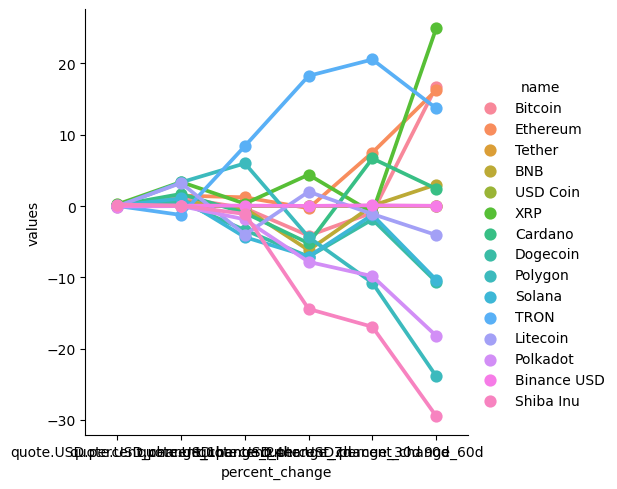

In [92]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')



In [98]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,26778.42453,2023-05-26 21:22:45.779817+00:00
15,Bitcoin,26758.41168,2023-05-26 21:23:32.564169+00:00
30,Bitcoin,26761.25491,2023-05-26 21:24:33.304262+00:00
45,Bitcoin,26746.57973,2023-05-26 22:11:09.495716+00:00
60,Bitcoin,26746.06832,2023-05-26 22:12:09.922607+00:00
75,Bitcoin,26747.38212,2023-05-26 22:13:10.376596+00:00
90,Bitcoin,26747.22109,2023-05-26 22:14:11.081951+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

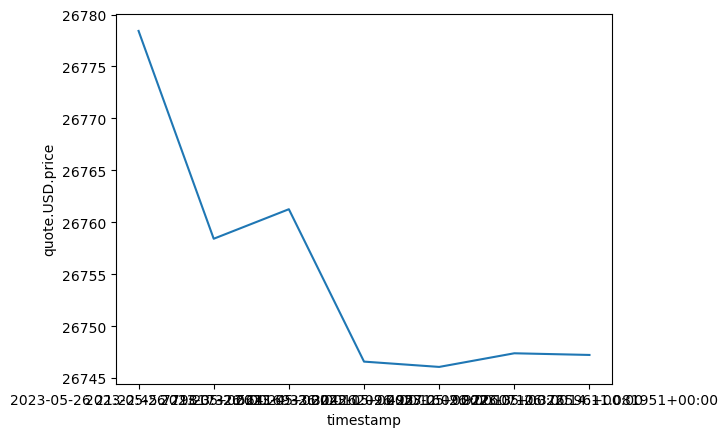

In [99]:
sns.lineplot(x='timestamp',y='quote.USD.price', data = df8)